# Exploratory Data Analysis Tabular Playground Series - Apr 2021

## Context

The dataset is synthetic and based on a real famous Titanic dataset and generated using a CTGAN. The statistical properties of this dataset are very similar to the original dataset.

#### Goals:
Do a statistical analysis, exploratory data analysis of dataset with visualizations.

#### Data Dictionary

- Survival:	0 = No, 1 = Yes
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex	
- Age: Age in years	
- SibSp: Number of siblings / spouses aboard the Titanic (brother, sister, stepbrother, stepsister, husband, wife)	
- Parch: Number of parents / children aboard the Titanic (mother, father, daughter, son, stepdaughter, stepson)	
- Ticket: Ticket number	
- Fare: Passenger fare	
- Cabin: Cabin number	
- Embarked:	Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

#### Used libraries

- pandas
- numpy
- matplotlib
- seaborn
- scipy 

and etc.

### Loading libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sps
import random
import math
import re
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
random.seed(42)

In [3]:
COLOR_0 = """Accent Accent_r Blues Blues_r BrBG BrBG_r BuGn BuGn_r BuPu BuPu_r CMRmap CMRmap_r Dark2 Dark2_r 
GnBu GnBu_r Greens Greens_r Greys Greys_r OrRd OrRd_r Oranges Oranges_r PRGn PRGn_r Paired Paired_r Pastel1 
Pastel1_r Pastel2 Pastel2_r PiYG PiYG_r PuBu PuBuGn PuBuGn_r PuBu_r PuOr PuOr_r PuRd PuRd_r Purples Purples_r RdBu RdBu_r 
RdGy RdGy_r RdPu RdPu_r RdYlBu RdYlBu_r RdYlGn RdYlGn_r Reds Reds_r Set1 Set1_r Set2 Set2_r Set3 Set3_r Spectral Spectral_r 
Wistia Wistia_r YlGn YlGnBu YlGnBu_r YlGn_r YlOrBr YlOrBr_r YlOrRd YlOrRd_r afmhot afmhot_r autumn autumn_r binary binary_r 
bone bone_r brg brg_r bwr bwr_r cividis cividis_r cool cool_r coolwarm coolwarm_r copper copper_r cubehelix cubehelix_r
 flag flag_r gist_earth gist_earth_r gist_gray gist_gray_r gist_heat gist_heat_r gist_ncar gist_ncar_r gist_rainbow
 gist_rainbow_r gist_stern gist_stern_r gist_yarg gist_yarg_r gnuplot gnuplot2 gnuplot2_r gnuplot_r gray gray_r 
 hot hot_r hsv hsv_r icefire icefire_r inferno inferno_r magma magma_r mako mako_r nipy_spectral nipy_spectral_r 
 ocean ocean_r pink pink_r plasma plasma_r prism prism_r rainbow rainbow_r rocket rocket_r seismic seismic_r spring spring_r
 summer summer_r tab10 tab10_r tab20 tab20_r tab20b tab20b_r tab20c tab20c_r terrain terrain_r twilight twilight_r 
 twilight_shifted twilight_shifted_r viridis viridis_r vlag vlag_r winter winter_r"""
COLOR = COLOR_0.replace('\n','').split(' ')

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.shape

(100000, 12)

#### Functions

In [6]:
def check_hypot_xi_2(data1, data2):
    '''Testing hypotheses on categorical features'''
    info = [data1, data2] 
    print(info)
    _, p, _, _ = sps.chi2_contingency(info) 
    significance_level = 0.05
    print("p value: " + str(round(p,4))) 
    if p <= significance_level: 
        print('Rejecting the null hypothesis') 
    else: 
        print('Failed to reject the null hypothesis')

In [7]:
def mis_data(data, column):
    """ Calculation of missing values in columns depending on whether the passenger survived or not """
    mis = round(data[data[column].isna()].groupby('survived')['pclass'].count()/data.groupby('survived')['pclass'].count()*100,2)
    print(f"""    Missing values in the feature {column}, when survived =0: {mis[0]}%
    Missing values in the feature {column}, when survived =1: {mis[1]}%""")

In [8]:
def pict_num(data, column, color, title):
    """ Displaying the distribution of a numerical features"""
    f, ax = plt.subplots(figsize=(8, 6))
    sns.kdeplot(data[column], color=color, shade=True)
    ax.axvline(x=data[column].mean(),linestyle = '--', color = 'red', label = 'Mean')
    ax.axvline(x=data[column].median(),linestyle = '--', color = 'yellow', label = 'Median')
    ax.set_xlabel(column.capitalize(), fontsize = 14)
    ax.set_ylabel('Density', fontsize = 14)
    ax.tick_params(labelsize=12)
    plt.title(title, fontsize = 16,fontweight = 'bold')
    plt.legend(['Mean','Median',column.capitalize()])
    plt.grid()
    plt.show()

In [9]:
def fig_countplot(data_plot, x_data, hue_x, ax):
    '''Countplot'''
    sns.countplot(x= x_data, hue = hue_x, data = data_plot, palette = random.choice(COLOR), ax=ax)
    ax.grid(alpha = 0.3)
    ax.tick_params(labelsize=12)
    ax.set_xlabel(x_data.capitalize(), fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    return ax
 

In [10]:
def with_hue(plot, data, col, Number_of_categories, hue_categories): 
    '''Adding percentages on a plot'''
    a = data.groupby([col, 'survived'])['sex'].count().reset_index()
    patch = [p for p in plot.patches]
    if col != 'embarked':
        for i in range(Number_of_categories):
            total = data.groupby(col)['sex'].count()[a.loc[i*2+1,col]]

            for j in range(hue_categories):
                percentage = '{:.1f}%'.format(100 * a.loc[(2*i + j), 'sex']/total)
                x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.05
                y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()+1000 
                plot.annotate(percentage, (x, y), size = 11,rotation=90)
    else:
        for i,s in enumerate(df_fill[col].value_counts().index):
            total = df_fill.groupby(col)['sex'].count()[s]

            for j in range(2):
                percentage = '{:.1f}%'.format(100 * a[a[col]==s].iloc[j,2]/total)
                x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.05
                y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()+1000
                plot.annotate(percentage, (x, y), size = 11,rotation=90)       
    

In [11]:
def age_band(num):
    """Amount of family members"""
    for i in range(1, 11):
        if num < 10*int(i) :  return f'{(i-1) * 10} - {i*10}'

In [12]:
def name_pas(x):
    """Extracting a name"""
    return x.split()[-1]
def surname_pas(x):
    """Extracting a surname"""
    return x.split()[0][:-1]

In [13]:
def worldcloud_im(data):
    """Popular words"""
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",colormap=random.choice(COLOR)).generate(data)
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0) 
    plt.show()

In [14]:
def spl_tick(x):
    """Extracting letters from tickets"""
    return x.split()[0] if x.isdigit() == False else '-'

In [15]:
def re_symb(x):
    """Removing symbols"""
    return re.sub(r"[#%!@*.,!:;]", "", x)

In [16]:
def res_l(x):
    """Extracting letters from cabin name"""
    return x if x.isalpha() else x[0]

Required libraries were imported, data was loaded, functions were created.

# Data quality assessment

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


You can immediately pay attention to the name of the columns, which begin with a capital letter. It is better to change the names to lowercase, which will be done in the next cell.
It is also clear from the first 5 rows that there are missing values in the dataset.

In [18]:
df.columns = df.columns.str.lower()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   passengerid  100000 non-null  int64  
 1   survived     100000 non-null  int64  
 2   pclass       100000 non-null  int64  
 3   name         100000 non-null  object 
 4   sex          100000 non-null  object 
 5   age          96708 non-null   float64
 6   sibsp        100000 non-null  int64  
 7   parch        100000 non-null  int64  
 8   ticket       95377 non-null   object 
 9   fare         99866 non-null   float64
 10  cabin        32134 non-null   object 
 11  embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


As a result of using the *info* method, a summary of information about the presented dataset was demonstrated: all types of data are correct, there are missing values in the data.
The following graph will show the percentage of missing values by features.

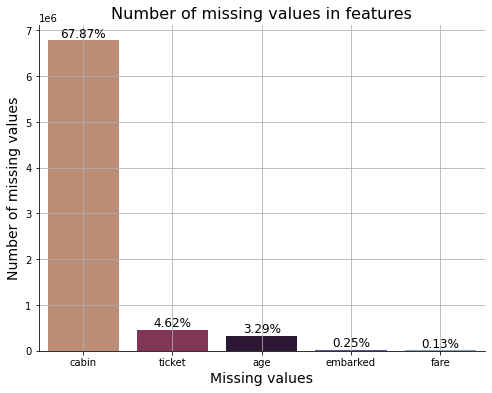

In [20]:
data_null = df.isna().sum().sort_values(ascending=False)
null_plot = data_null[data_null>0]*100
f, ax = plt.subplots(figsize=(8, 6))
sns.despine(f)
sns.barplot(null_plot.index, null_plot, palette = random.choice(COLOR))
plt.grid()
plt.title('Number of missing values in features', fontsize=16)
plt.xlabel('Missing values', fontsize=14)
plt.ylabel('Number of missing values', fontsize=14)
for i, val in enumerate(df.isna().mean().sort_values(ascending=False)*100):
    if val > 0:
        plt.text(i, null_plot.iloc[i], str(round(val,2))+'%', horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.show()

The graph shows that there are missing values in five features. The feature *cabin* has more than 60% of the missing data. In other columns less than 5%.
Possible reasons for missing values:
- since the data is synthetic, the authors could introduce additional complexity in this way, because the percentage of missing data differs from the original dataset;
- data was lost or information was not provided.

In the future, the data will be processed.

In [21]:
mis_data(df, 'age')

    Missing values in the feature age, when survived =0: 3.38%
    Missing values in the feature age, when survived =1: 3.17%


In [22]:
mis_data(df, 'fare')

    Missing values in the feature fare, when survived =0: 0.13%
    Missing values in the feature fare, when survived =1: 0.14%


In [23]:
mis_data(df, 'cabin')

    Missing values in the feature cabin, when survived =0: 78.02%
    Missing values in the feature cabin, when survived =1: 54.28%


The number of missing values for features *age* and *fare* and dividing into survivors and dead is the same.
And in the *cabin*, there are more missing values related to the dead passengers.

In [24]:
(df[['name','sex','ticket','age']].duplicated()).sum()

0

An initial explore of the data for the presence of missing values and duplicates was carried out.
The largest number of missing values in the feature *cabin* and is about 70%, in other features the number of missing values doesn't exceed 5%.

Duplicates wasn't found.

# Data exploration

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passengerid,100000.0,49999.500000,28867.657797,0.00,24999.75,49999.50,74999.25,99999.00
survived,100000.0,0.427740,0.494753,0.00,0.00,0.00,1.00,1.00
pclass,100000.0,2.106910,0.837727,1.00,1.00,2.00,3.00,3.00
age,96708.0,38.355472,18.313556,0.08,25.00,39.00,53.00,87.00
sibsp,100000.0,0.397690,0.862566,0.00,0.00,0.00,1.00,8.00
parch,100000.0,0.454560,0.950076,0.00,0.00,0.00,1.00,9.00
fare,99866.0,43.929330,69.588820,0.68,10.04,24.46,33.50,744.66


1) From the statistical description and viewing of the dataset, it can be seen that feature *passengerid* is a serial number and therefore it is unlikely that *passengerid* is associated with passenger survival. This feature will be removed;

2) *Survived* is a target and you can immediately notice that the survivors constitute less than half of the passengers;

3) *Pclass* is categorical feature;

4) The mean and median age values are very close;

5) Most of the passengers are single or have one relative on the ship;

6) The feature *fare* most likely doesn't have a normal distribution or there are outliers, since a large spread between the minimum and maximum values and 75% of the values are much less than the maximum.

Each feature will be explored in more detail.

In [26]:
cat_сols = [col for col in df.columns if df[col].dtype=="O"]
df[cat_сols].describe().T

,count,unique,top,freq
name,100000,92144,"Johnson, John",31
sex,100000,2,male,56114
ticket,95377,75331,A/5,602
cabin,32134,26992,C19828,6
embarked,99750,3,S,72139


1) Obviously, there are a lot of passengers on the ship with different names, but there are also namesakes;

2) There are more male passengers than female;

3) A wide variety of cabin numbers and tickets;

4) Three ports of departure of the ship are indicated and prevail Southampton.

#### Survived passengers

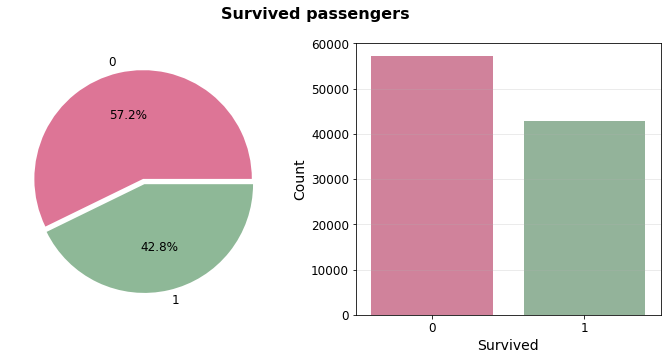

In [27]:
colors = ['#DD7596', '#8EB897']
color_palette = sns.color_palette(colors)
f,ax=plt.subplots(1,2,figsize=(12,5))
plt.suptitle('Survived passengers', fontsize = 16, fontweight = 'bold')
df['survived'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%', textprops={'fontsize': 12}, 
                                       ax=ax[0], colors = colors)
ax[0].set_ylabel('')

sns.countplot('survived',data=df,ax=ax[1],palette = color_palette)
ax[1].tick_params(labelsize=12)
ax[1].set_xlabel('Survived', fontsize = 14)
ax[1].set_ylabel('Count', fontsize = 14)
ax[1].grid(axis = 'y', alpha = 0.3)
plt.show()

Visual confirmation that there are fewer survivors than dead.
If the model was trained, it would be possible to consider options for balancing the sample. But the situation is not critical.

#### Distribution of numerical features

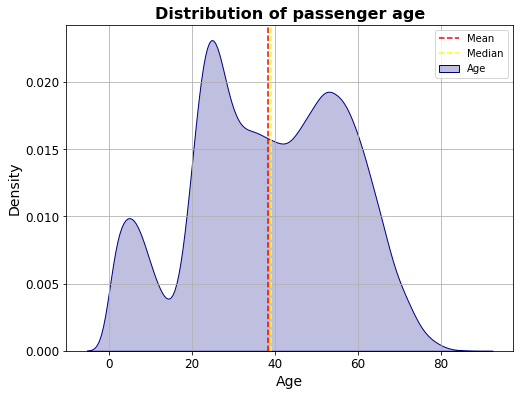

In [28]:
pict_num(df, 'age', 'navy', 'Distribution of passenger age')

In [29]:
stat = sps.shapiro(df.loc[df['age'].notna(),'age'].values)
stat

ShapiroResult(statistic=0.9783202409744263, pvalue=0.0)

The distribution of the passengers age isn't normal, as can be seen from the figure. As a result of the Shapiro-Wilk test, the null hypothesis about the normality of the distribution is rejected.
It can also be seen that the majority of passengers are adults.

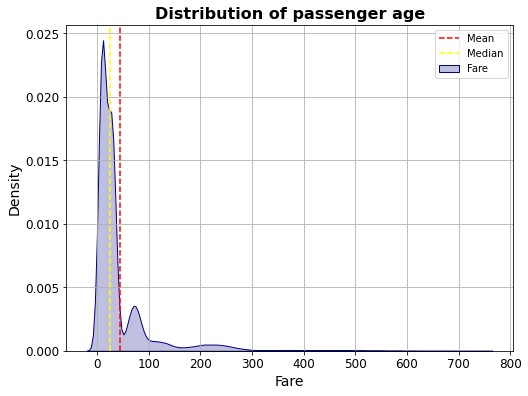

In [30]:
pict_num(df, 'fare', 'navy', 'Distribution of passenger age')

The distribution is right-skewed. The difference between the mean and median values is immediately noticeable. Most of the fare doesn't exceed 100.

#### Distribution of numerical features for survived and non-survived

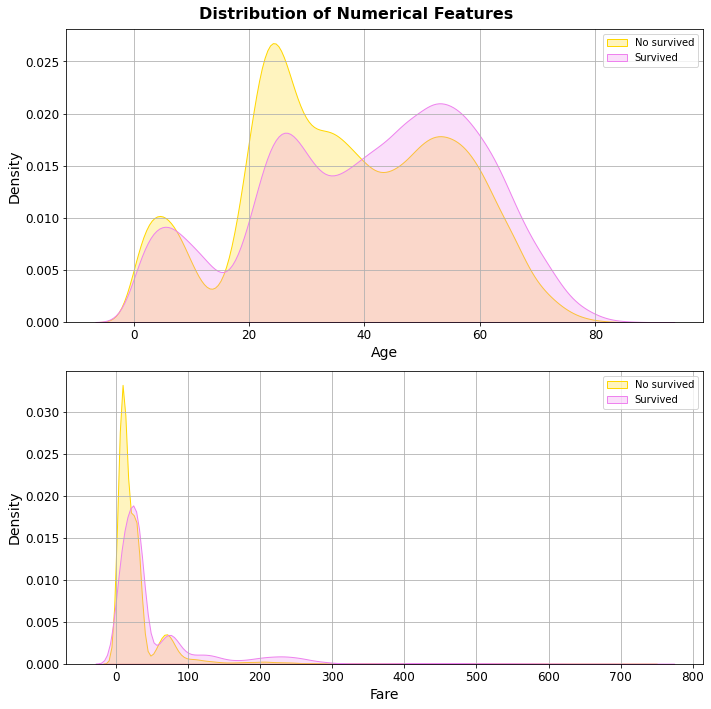

In [31]:
numerical_columns = ['age', 'fare']
num_rows, num_cols = 2,1
f, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))
plt.suptitle('Distribution of Numerical Features', fontsize = 16, fontweight = 'bold')

for index, column in enumerate(df[numerical_columns].columns):
    i,j = (index // num_cols, index % num_cols)
    sns.kdeplot(df.loc[df['survived'] == 0, column], color='gold', shade=True, ax=ax[i])
    sns.kdeplot(df.loc[df['survived'] == 1, column], color='violet',shade=True, ax=ax[i])
    ax[i].set_xlabel(numerical_columns[i].capitalize(), fontsize = 14)
    ax[i].set_ylabel('Density', fontsize = 14)
    ax[i].legend(['No survived','Survived'])
    ax[i].grid()
    ax[i].tick_params(labelsize=12)
plt.tight_layout()
plt.show()

Conclusions from the images:
- Fig.1 More middle-aged passengers (20-40 years) died than elderly ones.
- Fig.2 Passengers with lower fare have a lower chance to survived.

#### Number of survivors and non-survivors by gender

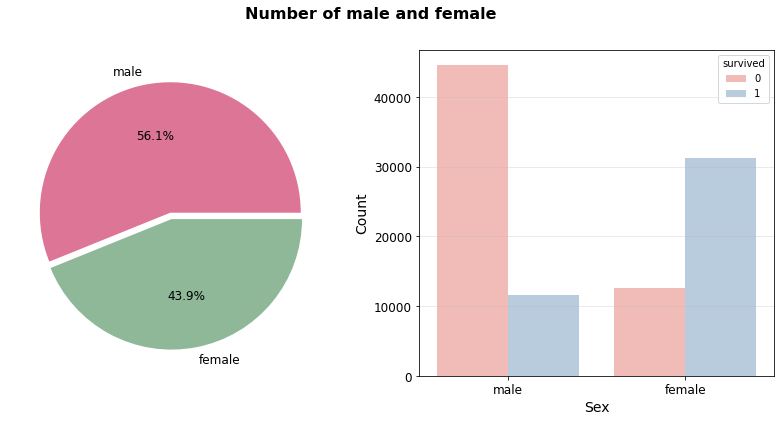

In [32]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.suptitle('Number of male and female', fontsize = 16, fontweight = 'bold')
df['sex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',textprops={'fontsize': 12},ax=ax[0], colors = colors)

ax[0].set_ylabel('')
sns.countplot('sex',data=df,hue='survived',ax=ax[1],palette = random.choice(COLOR))
ax[1].tick_params(labelsize=12)
ax[1].set_xlabel('Sex', fontsize = 14)
ax[1].set_ylabel('Count', fontsize = 14)
ax[1].grid(axis = 'y', alpha = 0.3)
plt.show()

In [33]:
a = df[df['sex']=='male'].groupby('survived')['pclass'].count().values
b = df[df['sex']=='female'].groupby('survived')['pclass'].count().values

In [34]:
check_hypot_xi_2(a, b)

[array([44566, 11548], dtype=int64), array([12660, 31226], dtype=int64)]
p value: 0.0
Rejecting the null hypothesis


In addition to the fact that there are more men than women, but the survival rate of men is less than that of women.
The differences in survival rates are so striking that it was possible to reject the null hypothesis that men and women survived and died equally.

#### Distribution of Categorical Features

In [35]:
df_fill = df.copy()
dict1 = {'C':'Cherbourg','Q':'Queenstown', 'S' : 'Southampton'}
df_fill['embarked'] = df_fill['embarked'].map(dict1).fillna('Not embarked')

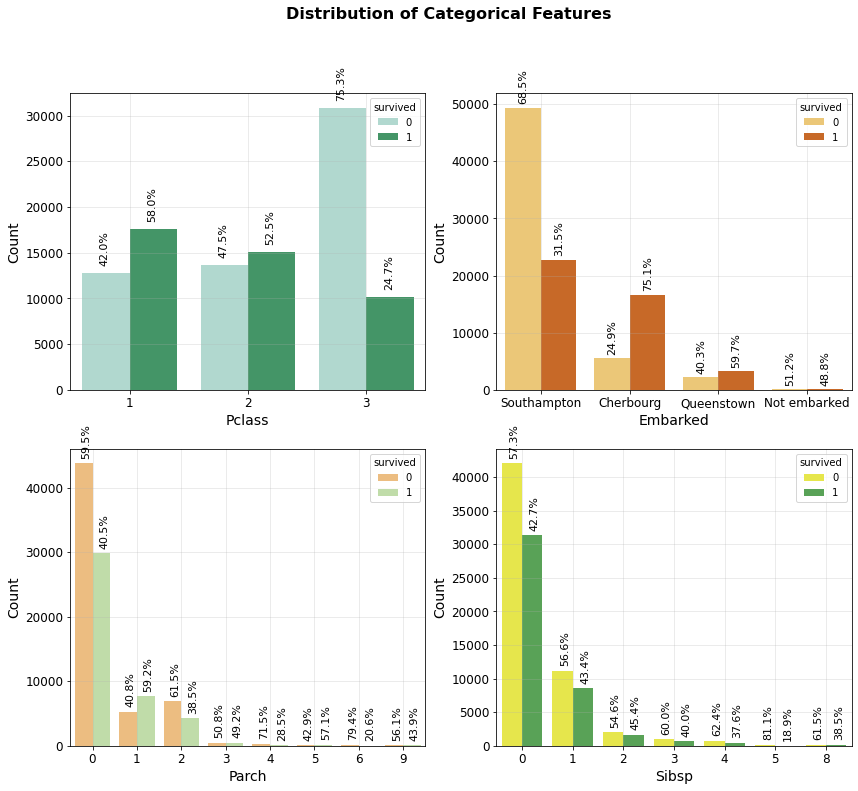

In [36]:
cat_col = ['pclass','embarked','parch','sibsp']
num_rows, num_cols = 2,2
fig, ax = plt.subplots(num_rows, num_cols, figsize = (14,12))
plt.suptitle('Distribution of Categorical Features', fontsize = 16, fontweight = 'bold')
for index, column in enumerate(df_fill[cat_col].columns):
    i,j = ((index // num_cols), (index % num_cols))
    fig_countplot(df_fill, column, 'survived', ax[i, j])
    with_hue(ax[i, j], df_fill, column, df_fill[column].nunique(), 2)

**Pclass**:
Most of the passengers on the ship were 3rd class. Most of them died. The number of 1st and 2nd class passengers are close.
But there are more survivors among 1st class passengers.

**Embarked**:
The largest number of passengers boarded the ship in the port of Southampton and they died the most. Passengers who have boarded from other ports have a greater chance of surviving.

**Parch** and **SibSp**:
And basically, regardless of the number of family members, most of them died. But there are a couple of categories where most still survived: *parch* = 1 and 5.

#### Amount of family members

In [37]:
df_fill['family'] = df_fill['parch'] + df_fill['sibsp']
df_fill['family']= df_fill['family'].apply(lambda x: str(x) if x<=4 else '4+')

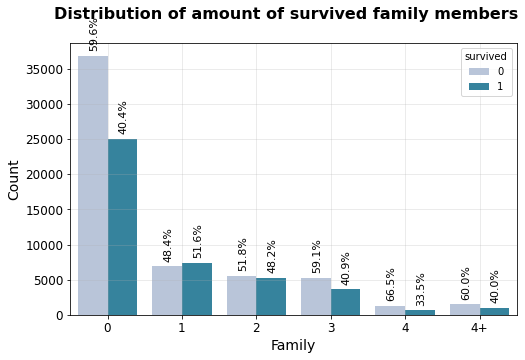

In [38]:
f, ax = plt.subplots(figsize=(8, 5))
plt.suptitle('Distribution of amount of survived family members', fontsize = 16, fontweight = 'bold')
fig_countplot(df_fill.sort_values(by='family'), 'family', 'survived', ax)
with_hue(ax, df_fill, 'family', df_fill['family'].nunique(), 2)
plt.show()

After the reduction of all relatives and family members into one feaure, the distribution practically didn't change. But in the case of model training, there will be no two similar feaures, which will affect the probability of model overfitting.

#### The number of passengers depending on the letter number of the ticket

In [39]:
df_fill['ticket'] = df_fill['ticket'].fillna('-')
df_fill['ticket_type'] = df_fill['ticket'].apply(spl_tick).apply(re_symb)

In [40]:
ticket = list(df_fill['ticket_type'].value_counts().index[1:11])

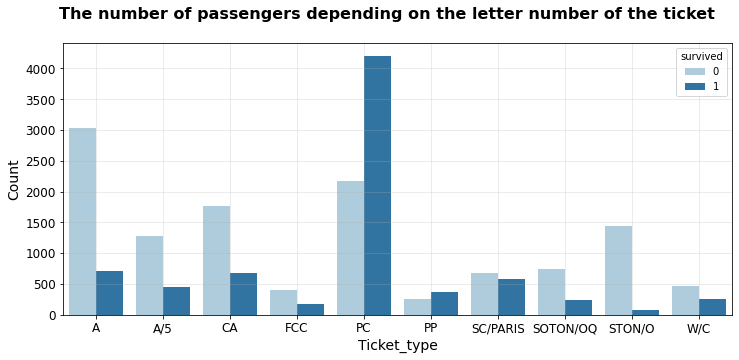

In [41]:
f, ax = plt.subplots(figsize=(12, 5))
plt.suptitle('The number of passengers depending on the letter number of the ticket', fontsize = 16, fontweight = 'bold')
fig_countplot(df_fill.query('ticket_type in @ticket').sort_values(by='ticket_type'), 'ticket_type', 'survived', ax)
plt.show()

The image shows the top-10 letter part of the ticket numbers and the number of passengers who had such tickets.
The greatest probability was to survive among those people who had tickets with the letters *PC* and *PP*.
Worst survival rates for passengers with letter ticket numbers *A* and *STON/O*.

#### The number of passengers depending on the letter of the cabin

In [42]:
df_fill['cabin'] = df_fill['cabin'].fillna('NO').apply(res_l) 

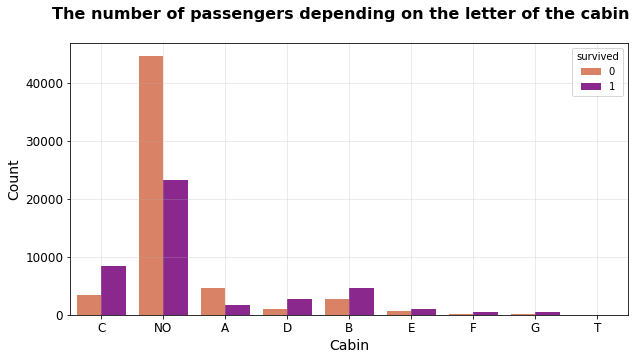

In [43]:
f, ax = plt.subplots(figsize=(10, 5))
plt.suptitle('The number of passengers depending on the letter of the cabin', fontsize = 16, fontweight = 'bold')
fig_countplot(df_fill, 'cabin', 'survived', ax)
plt.show()

The worst survival rates were for passengers whose cabin wasn't listed or those traveling in cabin A.

#### Popular names and surnames

In [44]:
df_fill['surname_pas'] = df_fill['name'].apply(surname_pas)
df_fill['name_pas'] = df_fill['name'].apply(name_pas)

In [45]:
name_male = ' '.join(df_fill.query('sex == "male"')['name_pas'].value_counts().head(15).index)
name_female  = ' '.join(df_fill.query('sex == "female"')['name_pas'].value_counts().head(15).index)
surname  = ' '.join(df_fill['surname_pas'].value_counts().head(15).index)

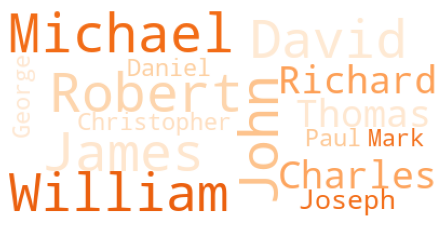

In [46]:
worldcloud_im(name_male)

Top-15 most popular male names among passengers. The decrease in the size of the letters corresponds to the decrease in the frequency of the name.

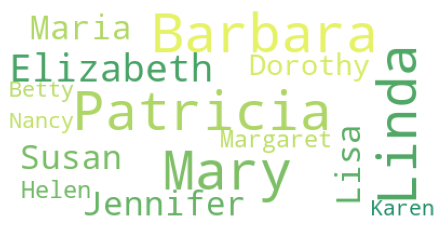

In [47]:
worldcloud_im(name_female)

Top-15 most popular female names among passengers. The decrease in the size of the letters corresponds to the decrease in the frequency of the name.

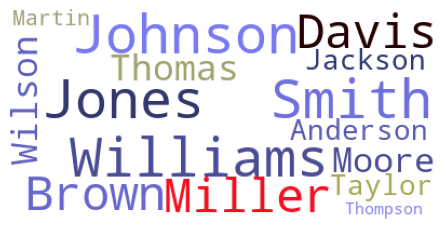

In [48]:
worldcloud_im(surname)

Top-15 most popular surnames among passengers. The decrease in the size of the letters corresponds to the decrease in the frequency of the name.

#### Age distribution by Pclass

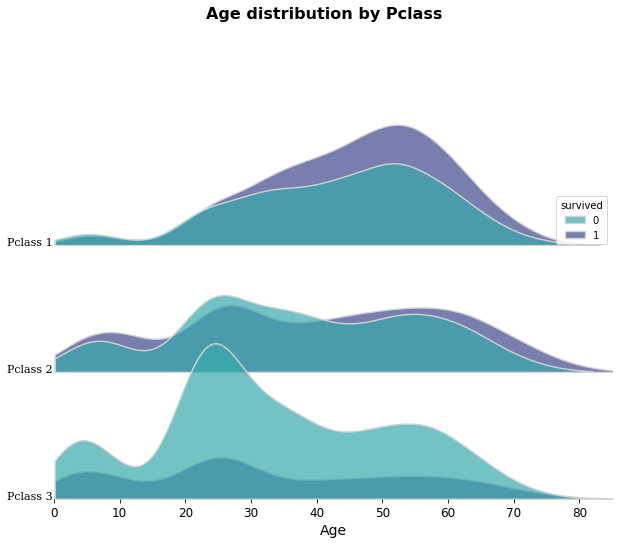

In [49]:
fig = plt.figure(figsize=(10, 8))
plt.suptitle('Age distribution by Pclass', fontsize = 16, fontweight = 'bold')
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.3)
axes = list()
for idx, cls in zip(range(3), sorted(df['pclass'].unique())):
    axes.append(fig.add_subplot(gs[idx, 0]))
    sns.kdeplot(x='age', data=df[df['pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.20, 
                lw=1.4, edgecolor='lightgray', hue='survived', 
                palette='mako_r', alpha=0.7
               ) 
    axes[idx].set_ylim(0, 0.025)
    axes[idx].set_xlim(0, 85)
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    axes[idx].spines[["top","right","left","bottom"]].set_visible(False)
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    
    if idx != 1 : axes[idx].get_legend().remove()
axes[2].tick_params(labelsize=12)
axes[2].set_xlabel('Age', fontsize = 14)
plt.show() 

In [50]:
df_fill.groupby(['pclass','survived'])['age'].mean()

pclass  survived
1       0           43.385873
        1           45.778975
2       0           37.540366
        1           39.617185
3       0           33.580978
        1           32.880432
Name: age, dtype: float64

The average age of 1st class passengers is approximately 45. Children travel with them much less. People from 2nd class traveled  almost evenly of all ages. The 3rd class passengers are mostly young middle-aged people around 30. There were also many children traveling in this class.

#### Survivors by age group

In [51]:
df_fill['age_band'] = df_fill['age'].apply(age_band)
titanic_age = df_fill[['age_band', 'survived']].groupby('age_band')['survived'].value_counts().sort_index().unstack().fillna(0)
age_band = df_fill['age_band'].value_counts().sort_index()
age_band_pr = titanic_age[1]/age_band*100

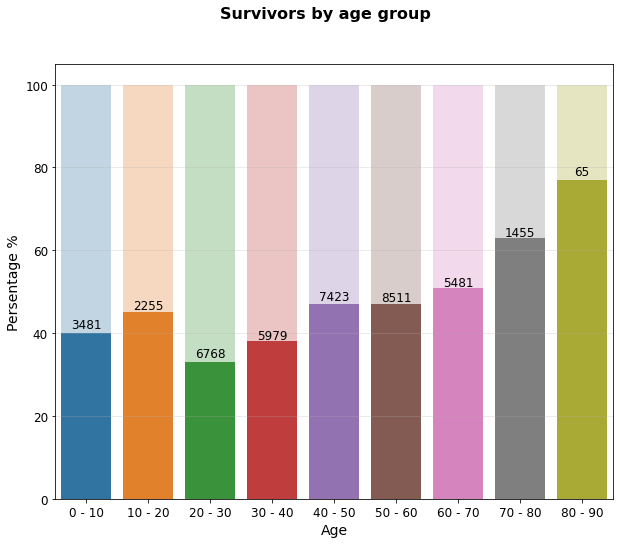

In [52]:
fig, ax = plt.subplots(figsize = (10,8))
plt.suptitle('Survivors by age group', fontsize = 16, fontweight = 'bold')
sns.barplot(x = age_band.index, y = age_band/age_band*100, alpha = 0.3)
sns.barplot(x = age_band.index, y = age_band_pr.apply(round))
for i, val in enumerate(titanic_age[1]):
    ax.text(i, age_band_pr[i], str(val), horizontalalignment='center', 
            verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
ax.set_xlabel('Age', fontsize = 14)
ax.set_ylabel('Persentage %', fontsize = 14)
ax.tick_params(labelsize=12)
ax.grid(axis = 'y', alpha = 0.3)
plt.show()

More than 60% of passengers aged 70-90 survived. But on the other hand, compared to the rest of the age categories, there were much fewer such passengers and, as seen from the previous images, most elder passengers were 1st class.
Also confirmed a large number of deaths aged 20-30. Most likely, this value is due to the large number of dead passengers of the 3rd class.

#### Distribution of the logarithm of fare depending on the age category for different ticket classes

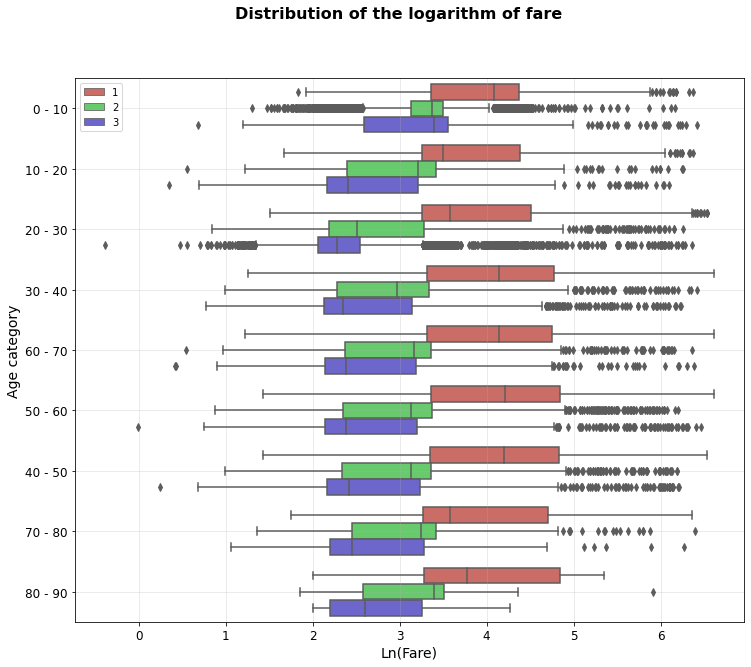

In [53]:
fig, ax = plt.subplots(figsize = (12,10))
plt.suptitle('Distribution of the logarithm of fare', fontsize = 16, fontweight = 'bold')
df_fill['log'] = df_fill['fare'].apply(math.log)
sns.boxplot(y='age_band',x="log",data=df_fill,
              hue="pclass", palette="hls", )
ax.set_xlabel('Ln(Fare)', fontsize = 14)
ax.set_ylabel('Age category', fontsize = 14)
ax.tick_params(labelsize=12)
ax.legend(loc='upper left')
ax.grid(alpha = 0.3)
plt.show()

In this representation, the interquarter ranges of fare are approximately similar between ticket classes and for different age categories, although the median values differ. Therefore, when fitting the model, we can recommend the logarithmic representation of the fare.

#### Correlation between features

In [54]:
le = LabelEncoder()
le_data = df_fill.copy().drop(columns=['passengerid','name','ticket'])
column_le = []
for col in le_data.columns:
    if df_fill[col].dtype == 'O':
        column_le.append(col)
for col in column_le:
    le_data[col] = le.fit_transform(le_data[col])  

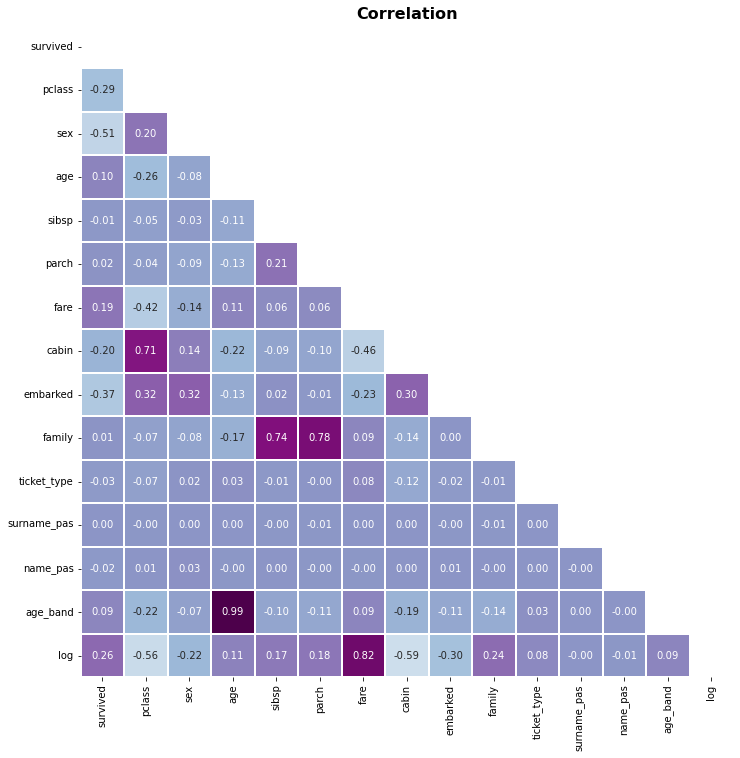

In [55]:
fig, ax = plt.subplots(figsize=(12, 12))
corr = le_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
for idx, method in enumerate(['pearson']):
    sns.heatmap(le_data.corr(method=method),
            square=True, annot=True, fmt='.2f', center=0, linewidth=2,
            cbar=False, cmap=random.choice(COLOR),
            mask=mask
           ) 
plt.title('Correlation', fontsize = 16, fontweight = 'bold')
plt.show()

If ignore the correlation between the features produced from each other, then linear dependencies between them are practically not revealed. Some of the created features must be removed so that the weights are not distorted when the model is fitted.
For example, it is better to leave the fare logarithmic than the original one, as the correlation increased slightly after the fare conversion.

#### Transformation of missing values 

In [56]:
group_data = df_fill.groupby('pclass')
df_fill['age'] = group_data['age'].apply(lambda x: round(x.fillna(x.median())))
df_fill['fare'] = group_data['fare'].apply(lambda x: round(x.fillna(x.median())))
df_fill['log'] = df_fill['fare'].apply(math.log)
df_fill['embarked'] = df_fill['embarked'].where(df_fill['embarked']!='Not embarked',df_fill['embarked'].mode()[0])
df_ready = df_fill.drop(columns=['passengerid','name','ticket','sibsp', 'parch','age_band','fare']).copy()

In [57]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   survived     100000 non-null  int64  
 1   pclass       100000 non-null  int64  
 2   sex          100000 non-null  object 
 3   age          100000 non-null  float64
 4   cabin        100000 non-null  object 
 5   embarked     100000 non-null  object 
 6   family       100000 non-null  object 
 7   ticket_type  100000 non-null  object 
 8   surname_pas  100000 non-null  object 
 9   name_pas     100000 non-null  object 
 10  log          100000 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 8.4+ MB


- The missing values in the numerical features were filled in with median values relative to the class of tickets, since the distributions of these features differ relative to the class. 
- The missing values in the feature *cabin* are filled with the value *NO*, because there are too many of them. 
- The missing values in the feature *embarked* are filled with the most frequent value, since the remaining options are much inferior in number to the most popular one.
- Some features were also removed due to uselessness, or after they were used to visualize or create a new more promising feature.

# Summary

As a result of the study of the data:
- Missing values are identified. The largest number in the feature *cabin* - more than 67%. They were filled with "NO" because they are difficult to recover. In the remaining columns, either the median values relative to the ticket class (numeric features) or the most popular value were filled in;
- the average and median age of passengers is almost the same and is approximately equal to 39, but differs by ticket class;
- the ratio of surviving (43%) and non-surviving (57%) passengers relative to other features was explored. Dominated by non-survivors. There are more survivors among passengers with a higher fare, who were elder (from 40 years old) and had 1st class tickets. There are also more female who were survivors. There was also a higher chance of survival among those who traveled alone;
- new features were created, and some of the original ones were removed;
- there is practically no correlation between the features. 